In [3]:
import os, random, math, numpy as np, pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
def seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Load Dataset

In [7]:
DATA_ROOT = "/kaggle/input/70-dog-breedsimage-data-set"

train_dir = os.path.join(DATA_ROOT, "train")
val_dir   = os.path.join(DATA_ROOT, "valid") 
test_dir  = os.path.join(DATA_ROOT, "test")

print("Train exists:", os.path.isdir(train_dir))
print("Valid exists:", os.path.isdir(val_dir))
print("Test exists :", os.path.isdir(test_dir))

Train exists: True
Valid exists: True
Test exists : True


# Classes Count and Images Splitting

In [8]:
def count_images(root):
    classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])
    counts = []
    for c in classes:
        cpath = os.path.join(root, c)
        n = len([f for f in os.listdir(cpath) if f.lower().endswith((".jpg",".jpeg",".png"))])
        counts.append((c, n))
    df = pd.DataFrame(counts, columns=["class", "count"]).sort_values("count", ascending=False)
    return df, classes

train_df, classes = count_images(train_dir)
val_df, _ = count_images(val_dir)
test_df, _ = count_images(test_dir)

print("Num classes:", len(classes))
print("Train images:", train_df["count"].sum())
print("Val images  :", val_df["count"].sum())
print("Test images :", test_df["count"].sum())

train_df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Num classes: 70
Train images: 7946
Val images  : 700
Test images : 700


,class,count
66,Shih-Tzu,198
49,Lhasa,187
48,Labrador,161
6,Basset,159
63,Scotch Terrier,150


# Ploting The Class Balance

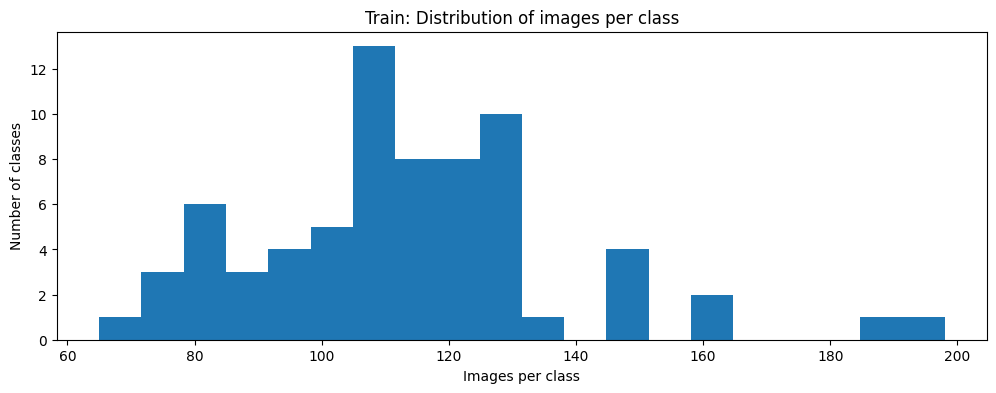

,count
count,70.000000
mean,113.514286
std,24.683353
min,65.000000
25%,99.000000
50%,111.500000
75%,125.000000
max,198.000000


In [9]:
plt.figure(figsize=(12,4))
plt.hist(train_df["count"], bins=20)
plt.title("Train: Distribution of images per class")
plt.xlabel("Images per class")
plt.ylabel("Number of classes")
plt.show()

train_df.describe()